In [1]:
# !unzip "/content/drive/MyDrive/GEN AI/DL/archive (1).zip" -d "/content/drive/MyDrive/GEN AI/DL/chest_xray"

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
!ls "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray"

chest_xray  __MACOSX  test  train  val


In [4]:
# Setting the libraries
DataDir = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/train"

In [5]:
import os
print(os.listdir(DataDir))

['NORMAL', 'PNEUMONIA']


In [6]:
CATEGORIES = os.listdir(DataDir)
print(CATEGORIES)

['NORMAL', 'PNEUMONIA']


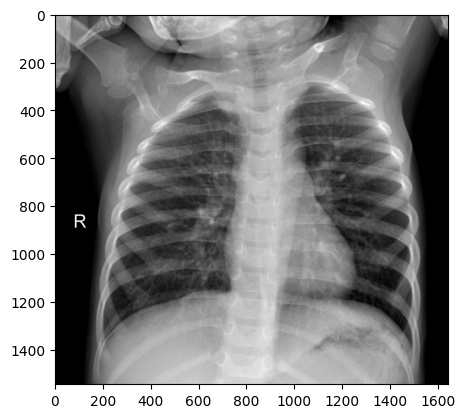

In [7]:
for i in CATEGORIES:
  path = os.path.join(DataDir, i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

In [8]:
# Initializing the size of the image so that every image should be in same dimension
img_size = 100

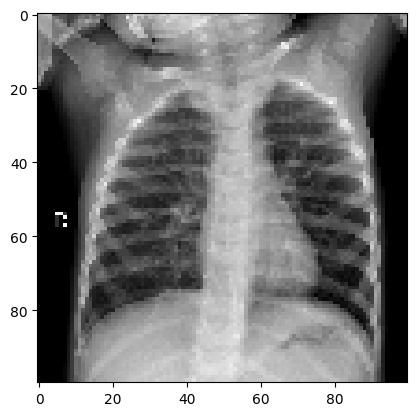

In [9]:
# Image after resize and gray scale
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

In [11]:
# Defining the function for training data according to the categories convert
# Converting it into numpy arrays
def create_training_data():
  for category in CATEGORIES:

    path = os.path.join(DataDir, category)
    class_nums = CATEGORIES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, class_nums])

      except Exception as e:
        pass

In [12]:
create_training_data()

In [13]:
print(len(training_data))

5216


In [14]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample)

[array([[ 19,  28,  28, ..., 109, 107,  89],
       [ 27,  36,  36, ..., 101,  90,  89],
       [ 32,  41,  48, ...,  88,  92,  80],
       ...,
       [  0,   0,  17, ...,  85,  66,  36],
       [  0,   0,  17, ...,  84,  63,  36],
       [  0,   0,  20, ...,  87,  64,  36]], dtype=uint8), 0]
[array([[182, 152,  75, ..., 192, 220, 216],
       [166, 155,  72, ..., 195, 214, 213],
       [ 91,  98,  22, ..., 198, 213, 213],
       ...,
       [ 27,  26,  25, ...,  31,  33,  37],
       [ 27,  26,  25, ...,  31,  33,  38],
       [ 27,  25,  24, ...,  31,  33,  37]], dtype=uint8), 1]
[array([[188, 188, 141, ...,  42,  41,  39],
       [178, 164, 108, ...,  45,  43,  43],
       [152, 118,  73, ...,  50,  47,  45],
       ...,
       [ 14,  14,  61, ...,  27,  27,  18],
       [ 19,  12,  66, ...,  27,  28,  28],
       [ 19,  11,  72, ...,  27,  27,  28]], dtype=uint8), 1]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
      

In [15]:
X = []
y = []

In [16]:
# Splitting the features and labels
for features, label in training_data:
  X.append(features)
  y.append(label)

In [17]:
print(X[0].reshape(-1, img_size, img_size, 1))

[[[[ 19]
   [ 28]
   [ 28]
   ...
   [109]
   [107]
   [ 89]]

  [[ 27]
   [ 36]
   [ 36]
   ...
   [101]
   [ 90]
   [ 89]]

  [[ 32]
   [ 41]
   [ 48]
   ...
   [ 88]
   [ 92]
   [ 80]]

  ...

  [[  0]
   [  0]
   [ 17]
   ...
   [ 85]
   [ 66]
   [ 36]]

  [[  0]
   [  0]
   [ 17]
   ...
   [ 84]
   [ 63]
   [ 36]]

  [[  0]
   [  0]
   [ 20]
   ...
   [ 87]
   [ 64]
   [ 36]]]]


In [18]:
y = np.array(y)

In [19]:
# Reshapping the features for making it compatible with tensoflow
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [20]:
# As we do for training data similiarly doing with validation data
validation_data = []
DataDir_val = r"/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val"

In [21]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [22]:
create_validating_data()
print(len(validation_data))

16


In [23]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
  print(sample)

[array([[10, 32, 26, ..., 71, 64, 56],
       [11, 38, 35, ..., 79, 68, 61],
       [13, 37, 38, ..., 81, 76, 66],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[ 0,  0,  0, ..., 11,  0,  0],
       [ 5,  4, 17, ..., 10,  0,  0],
       [12, 15, 25, ...,  8,  0,  0],
       ...,
       [ 0,  0,  9, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[ 2, 17, 31, ..., 95, 86, 68],
       [ 6, 14, 25, ..., 94, 68, 62],
       [ 2, 10, 23, ..., 88, 73, 60],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[  8,  96,  46, ...,  19,  19,  14],
       [  1, 100,  80, ...,  26,  23,  16],
       [ 77,  73, 112, ...,  24,  20,  16],
       ...,
       [  0,   3,   7, ...,   0,   0,   0],
       [  0,   0,   6, ...,   0,  

In [24]:
X_val = []
y_val = []

In [25]:
for features, label in validation_data:
  X_val.append(features)
  y_val.append(label)

In [26]:
y_val = np.array(y_val)
X_val = np.array(X_val).reshape(-1, img_size, img_size, 1)

In [27]:
# Importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [28]:
# Pixles value ranges from 0 to 255, 0 means black, 255 means white....
# In oreder to scale it down to a scale of 0 to 1, we are performing this steps
X = X/255.
X_val = X_val/255.

In [29]:
X.shape

(5216, 100, 100, 1)

In [30]:
X_val.shape

(16, 100, 100, 1)

In [31]:
# initializing the neural network layer for traning the model
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,646,721 (13.91 MB)

 Trainable params: 3,646,721 (13.91 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# Fitting the model with 10 epochs and the validation data we have created
model.fit(X,y,
          batch_size = 4,
          epochs= 10,
          validation_data=(X_val, y_val))

Epoch 1/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8441 - loss: 0.3561 - val_accuracy: 0.6250 - val_loss: 0.7528
Epoch 2/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9423 - loss: 0.1498 - val_accuracy: 0.7500 - val_loss: 0.3479
Epoch 3/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9628 - loss: 0.1054 - val_accuracy: 1.0000 - val_loss: 0.1233
Epoch 4/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9661 - loss: 0.0913 - val_accuracy: 0.8125 - val_loss: 0.4683
Epoch 5/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9759 - loss: 0.0842 - val_accuracy: 1.0000 - val_loss: 0.0788
Epoch 6/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9733 - loss: 0.0730 - val_accuracy: 0.7500 - val_loss: 0.4800
Epoch 7/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9727 - loss: 0.0661 - val_accuracy: 1.0000 - val_loss: 0.0541
Epoch 8/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9763 - loss: 0.0594 

In [36]:
model.save("/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/model_10.keras")

In [45]:
# Importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [38]:
def prepare(image):
  img_size = 100
  # img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  img = tf.keras.preprocessing.image.load_img(image,color_mode='grayscale', target_size = (img_size, img_size))
  new_array = tf.keras.preprocessing.image.img_to_array(img)
  new_array = new_array/255.
  new_array = np.array(new_array).reshape(-1, img_size, img_size, 1)
  return new_array

In [39]:
model =tf.keras.models.load_model("/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/model_10.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [54]:
image = r'/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'

In [55]:
prediction = model.predict([prepare(image)])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[round(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.999995]]
1
PNEUMONIA


In [56]:
image2= r'/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'

In [57]:
prediction = model.predict([prepare(image2)])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[round(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.09612566]]
0
NORMAL


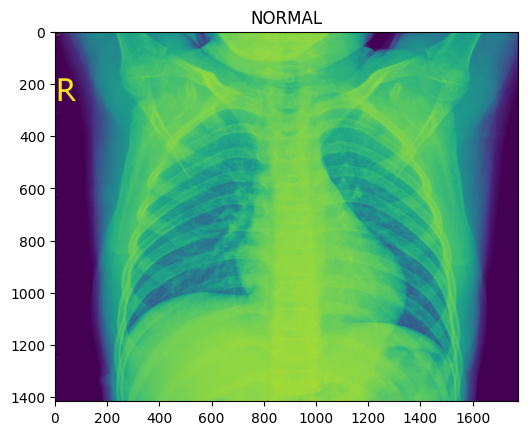

In [59]:
img = mpimg.imread(image2)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[round(prediction[0][0])])
plt.show()